# Breast cancer Prediction using K-Nearest Neighbors (K-NN)

## Importing the libraries

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [29]:
dataset = pd.read_csv('breast-cancer.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [30]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


## Splitting the dataset into the Training set and Test set

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
print(X_train)

[[ 0.91903747  0.9407658   2.30881719 ...  2.22576767  2.27129602
   0.24623928]
 [ 1.27578287 -0.04290763  1.63138773 ...  1.82407819  1.94996317
   3.74830911]
 [ 1.27578287  2.25233038  2.30881719 ...  2.62745714  2.27129602
  -0.33743902]
 ...
 [-1.22143494 -0.69868992 -0.73961536 ... -0.98774815 -0.62069958
  -0.33743902]
 [-0.50794414 -0.69868992 -0.73961536 ... -0.58605867 -0.62069958
  -0.33743902]
 [ 1.98927367  1.92443923  1.29267301 ...  1.42238871  1.30729749
  -0.33743902]]


In [51]:
print(X_test)

[[-1.22143494 -0.69868992 -0.73961536 ... -0.98774815 -0.62069958
  -0.33743902]
 [-0.50794414 -0.69868992 -0.73961536 ... -0.58605867 -0.62069958
  -0.33743902]
 [ 0.20554667  0.61287466  0.61524355 ...  0.21732028  0.02196611
  -0.33743902]
 ...
 [ 0.20554667 -0.69868992 -0.73961536 ... -0.18436919 -0.62069958
   0.24623928]
 [-0.86468954 -0.37079877 -0.40090064 ...  1.42238871 -0.62069958
  -0.33743902]
 [-0.86468954 -0.69868992 -0.73961536 ... -0.18436919 -0.62069958
  -0.33743902]]


## Finding best fit k value

Text(0, 0.5, 'Error Rate')

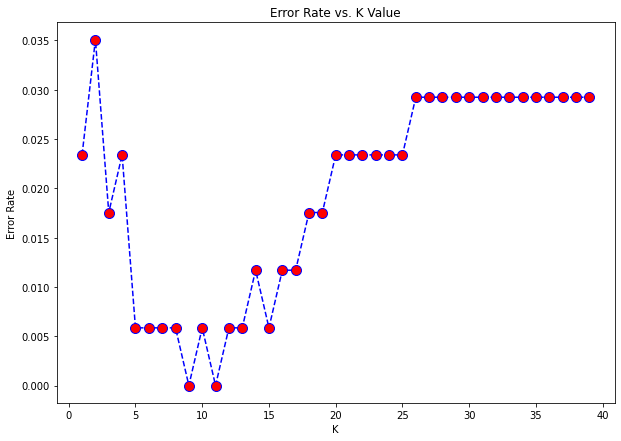

In [52]:
from sklearn.neighbors import KNeighborsClassifier
error_rates = []
for a in range(1, 40):
    k = a
    knn = KNeighborsClassifier(n_neighbors=k,metric = 'minkowski', p=2)
    knn.fit(X_train,y_train)
    preds = knn.predict(X_test)
    error_rates.append(np.mean(y_test - preds))

plt.figure(figsize=(10, 7))
plt.plot(range(1,40),error_rates,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Training the K-NN model on the Training set

### Training model with default k value (k=5)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [54]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

## Making the Confusion Matrix

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[103   4]
 [  5  59]]


0.9473684210526315

In [56]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       107
           1       0.94      0.92      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



### Training the model with minimum error rate k value

In [60]:
classifier1 = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
classifier1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [61]:
y_pred1 = classifier1.predict(X_test)

In [64]:
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
print(accuracy_score(y_test, y_pred1))
print(classification_report(y_test,y_pred1))

[[103   4]
 [  4  60]]
0.9532163742690059
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       107
           1       0.94      0.94      0.94        64

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



#Conclusion
The model has been given 94% accuracy with default value k however, above lbw method has been used to get minimum error rate k value. Here, minimum error rate captured on k=9. Thus, nodel has been trained again using k=9, then 95% accuracy has been given by model.